# Librerías

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, pi, exp
import pandas as pd

# Parámetros

In [73]:
a = 1.0        # longitud del paso
tau = 1.0      # tiempo por paso
N_hist = 500   # número de pasos para el histograma
prueba_hist = 30000  # número de simulaciones para el histograma
Ns_stats = [10, 20, 50, 100, 200, 500, 1000, 2000]  # N para calcular momentos
prueba_stats = 20000  # simulaciones por cada N
rng = np.random.default_rng(0)  # generador aleatorio 

# Simular la marcha

In [74]:
def simulacion_marcha(N, prueba, a=1.0, rng=None):
    "Devuelve posiciones finales x después de N pasos de ±a con p=1/2"
    if rng is None:
        rng = np.random.default_rng()
    pasos = rng.choice([-a, a], size=(prueba, N))
    x = pasos.sum(axis=1)
    return x

# Punto 7: Histograma + comparación con gaussiana (TCL)

In [75]:
x_hist = simulacion_marcha(N_hist, prueba_hist, a=a, rng=rng)
sigma = a * np.sqrt(N_hist)  # desviación típica teórica

# pdf gaussiana para comparación
def gauss_pdf(x, sigma):
    return (1.0/np.sqrt(2*pi*sigma**2)) * np.exp(-(x**2)/(2*sigma**2))

**Gráfica histograma**

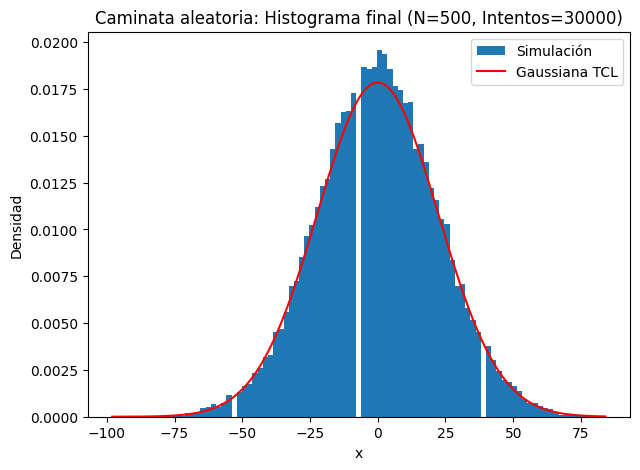

In [76]:
plt.figure(figsize=(7,5))
plt.hist(x_hist, bins='auto', density=True, label="Simulación")
xs = np.linspace(min(x_hist), max(x_hist), 500)
plt.plot(xs, gauss_pdf(xs, sigma), 'r-', label="Gaussiana TCL")
plt.title(f'Caminata aleatoria: Histograma final (N={N_hist}, Intentos={prueba_hist})')
plt.xlabel('x')
plt.ylabel('Densidad')
plt.legend()
plt.show()

# Punto 8

In [77]:
fila = []
for N in Ns_stats:
    xN = simulacion_marcha(N, prueba_stats, a=a, rng=rng)
    mean = xN.mean()
    media_sq = (xN**2).mean()
    var = media_sq - mean**2
    t = N * tau
    fila.append({"N": N, "t": t, "<x>": mean, "<x^2>": media_sq, "Var[x]": var})

df = pd.DataFrame(fila).sort_values("N").reset_index(drop=True)

**Ajuste lineal <x^2> vs t**

In [80]:
t_vals = df["t"].to_numpy()
x2_vals = df["<x^2>"].to_numpy()
A = np.vstack([t_vals, np.ones_like(t_vals)]).T
pendiente, intercepto = np.linalg.lstsq(A, x2_vals, rcond=None)[0]
D_hat = pendiente / 2.0


print("Constante de difusión numérica:", D_hat)
print("Constante de difusión teórica:", a**2/(2*tau))

Constante de difusión numérica: 0.4964457056003738
Constante de difusión teórica: 0.5


**Gráfica <x^2> vs N**

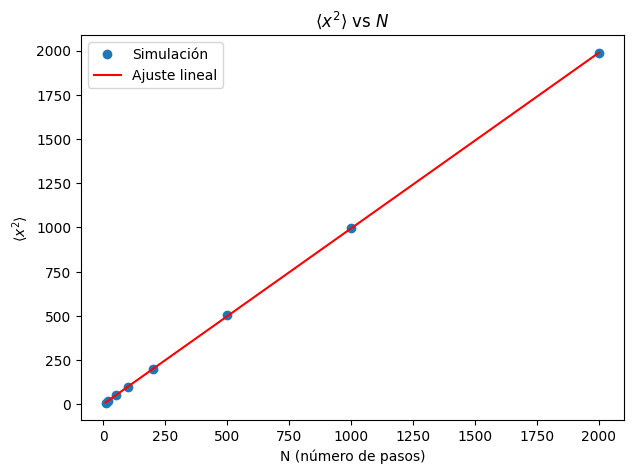

In [79]:
plt.figure(figsize=(7,5))
plt.plot(df["N"], df["<x^2>"], 'o', label="Simulación")
plt.plot(df["N"], pendiente*(df["t"]) + intercepto, 'r-', label="Ajuste lineal")
plt.title(r'$\langle x^2 \rangle$ vs $N$')
plt.xlabel('N (número de pasos)')
plt.ylabel(r'$\langle x^2 \rangle$')
plt.legend()
plt.show()